In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [2]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

In [3]:
df = pd.read_csv('sonar.all-data',header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


You can see that we are not specifying the names of the attributes this time. This is because
other than the class attribute (the last column), the variables do not have meaningful names.
We also indicate that there is no header information, this is to avoid file loading code taking the
first record as the column names.

#### It clear that variables have same scale, thats good
lets look at summary stats

In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


## Again, as we expect, the data has the same range, but interestingly <span class="mark">differing mean values</span>. There may be some <span class="girk">benefit</span> from <span class="mark">standardizing the data</span>.

In [6]:
# look at class value count
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

#### Thats a pretty good balance

##### Unimodal Data Visualizations

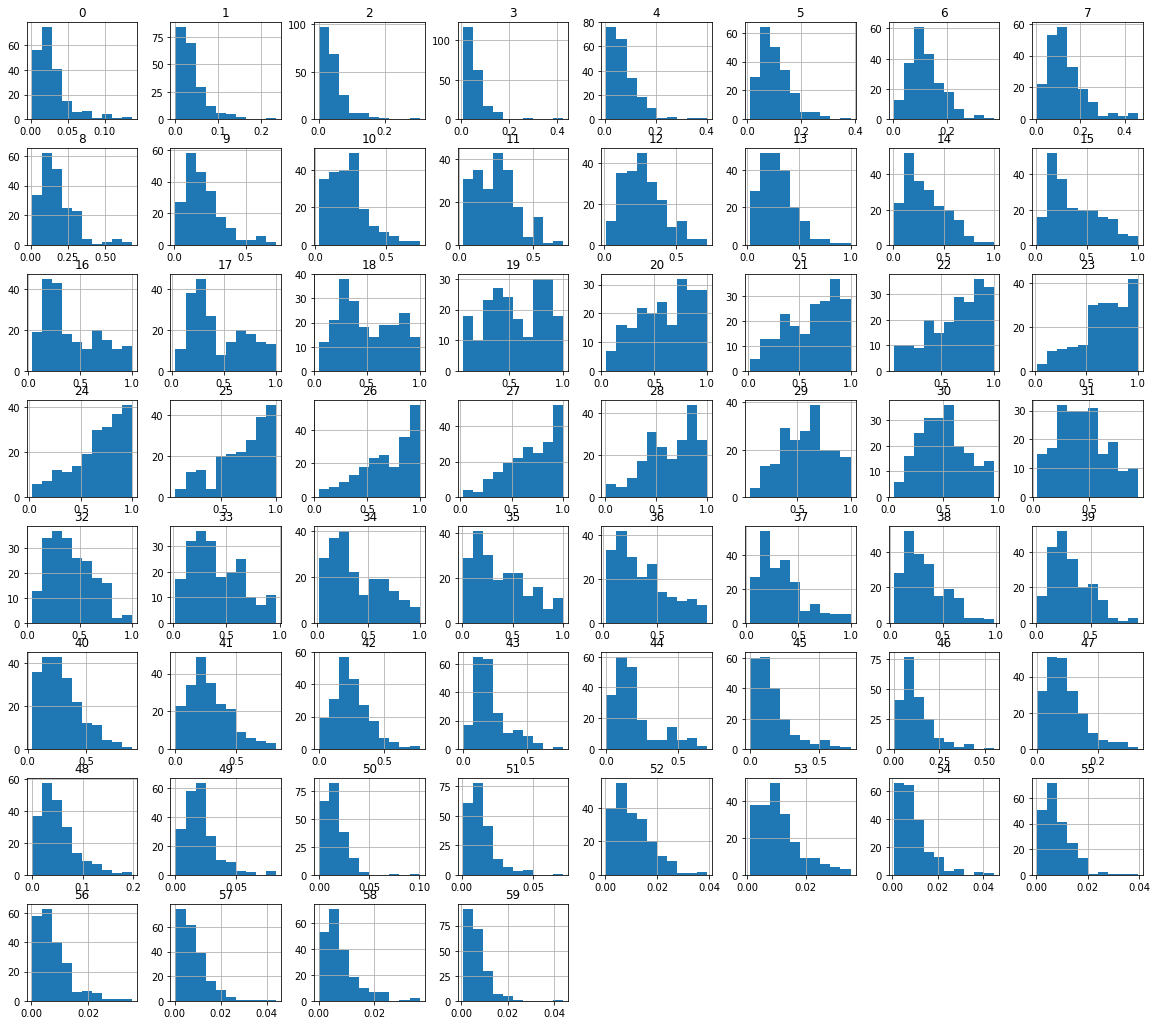

In [12]:
# histograms
df.hist(sharex=False,sharey=False,figsize=(20,18))
plt.show()

We can see that there are a lot of Gaussian-like distributions and perhaps some exponential-
like distributions for other attributes.

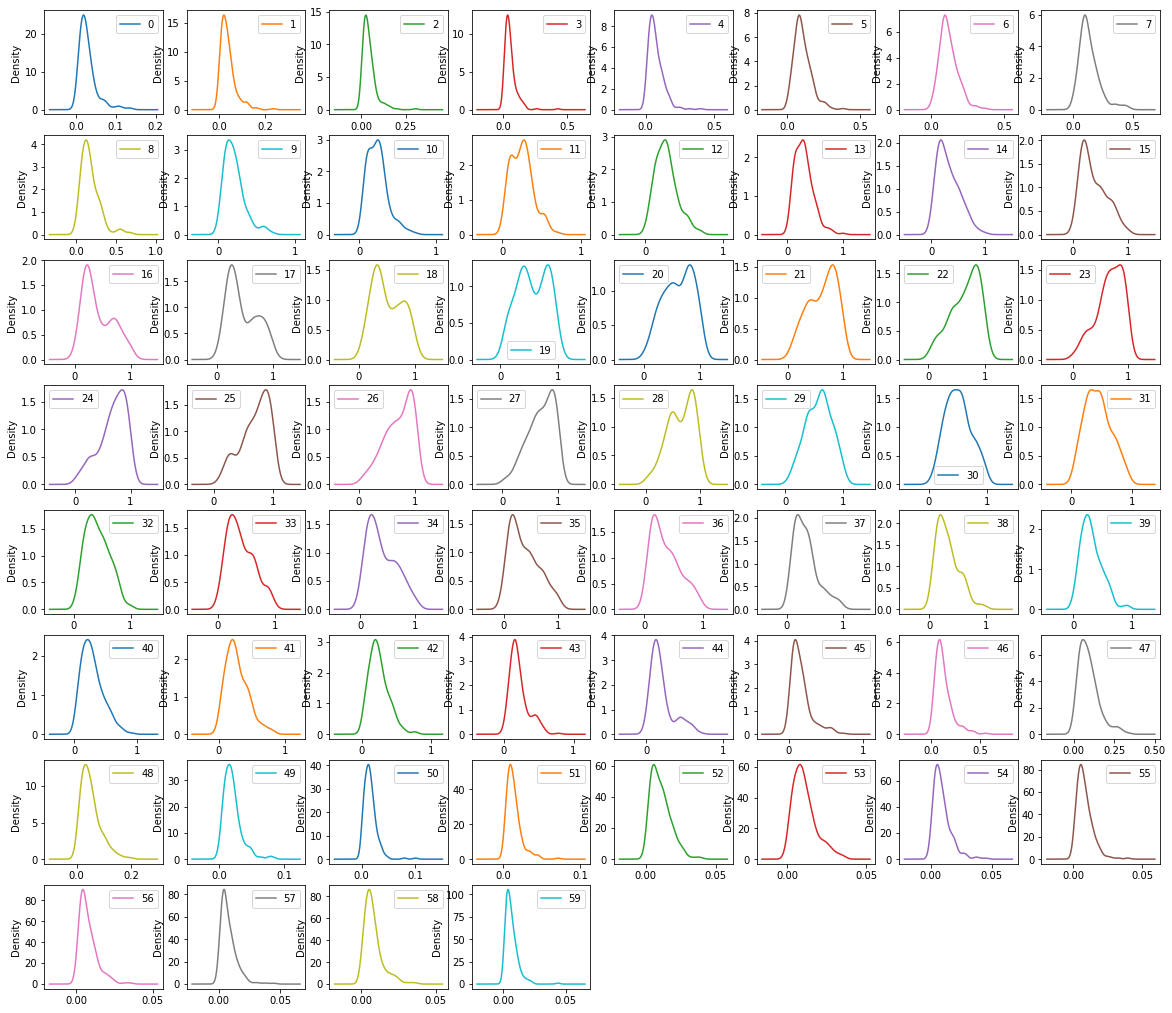

In [13]:
# density plots
df.plot(kind='density',subplots=True,figsize=(20,18),sharex=False,layout=(8,8))
plt.show()

This is useful, you can see that many of the attributes have a <span class="mark">skewed distribution</span>. A power
transform like a <span class="girk">Box-Cox transform</span> that can correct for the skew in distributions might be
useful.
https://stackoverflow.com/questions/33944129/python-library-for-data-scaling-centering-and-box-cox-transformation

In [25]:
ex = df.describe()

In [27]:
ex = ex.transpose()

In [32]:
ex.iplot(y='mean')

We can see that attributes do have quite different spreads. Given the scales are the same, it
may suggest some benefit in standardizing the data for modeling to get all of the means lined
up.

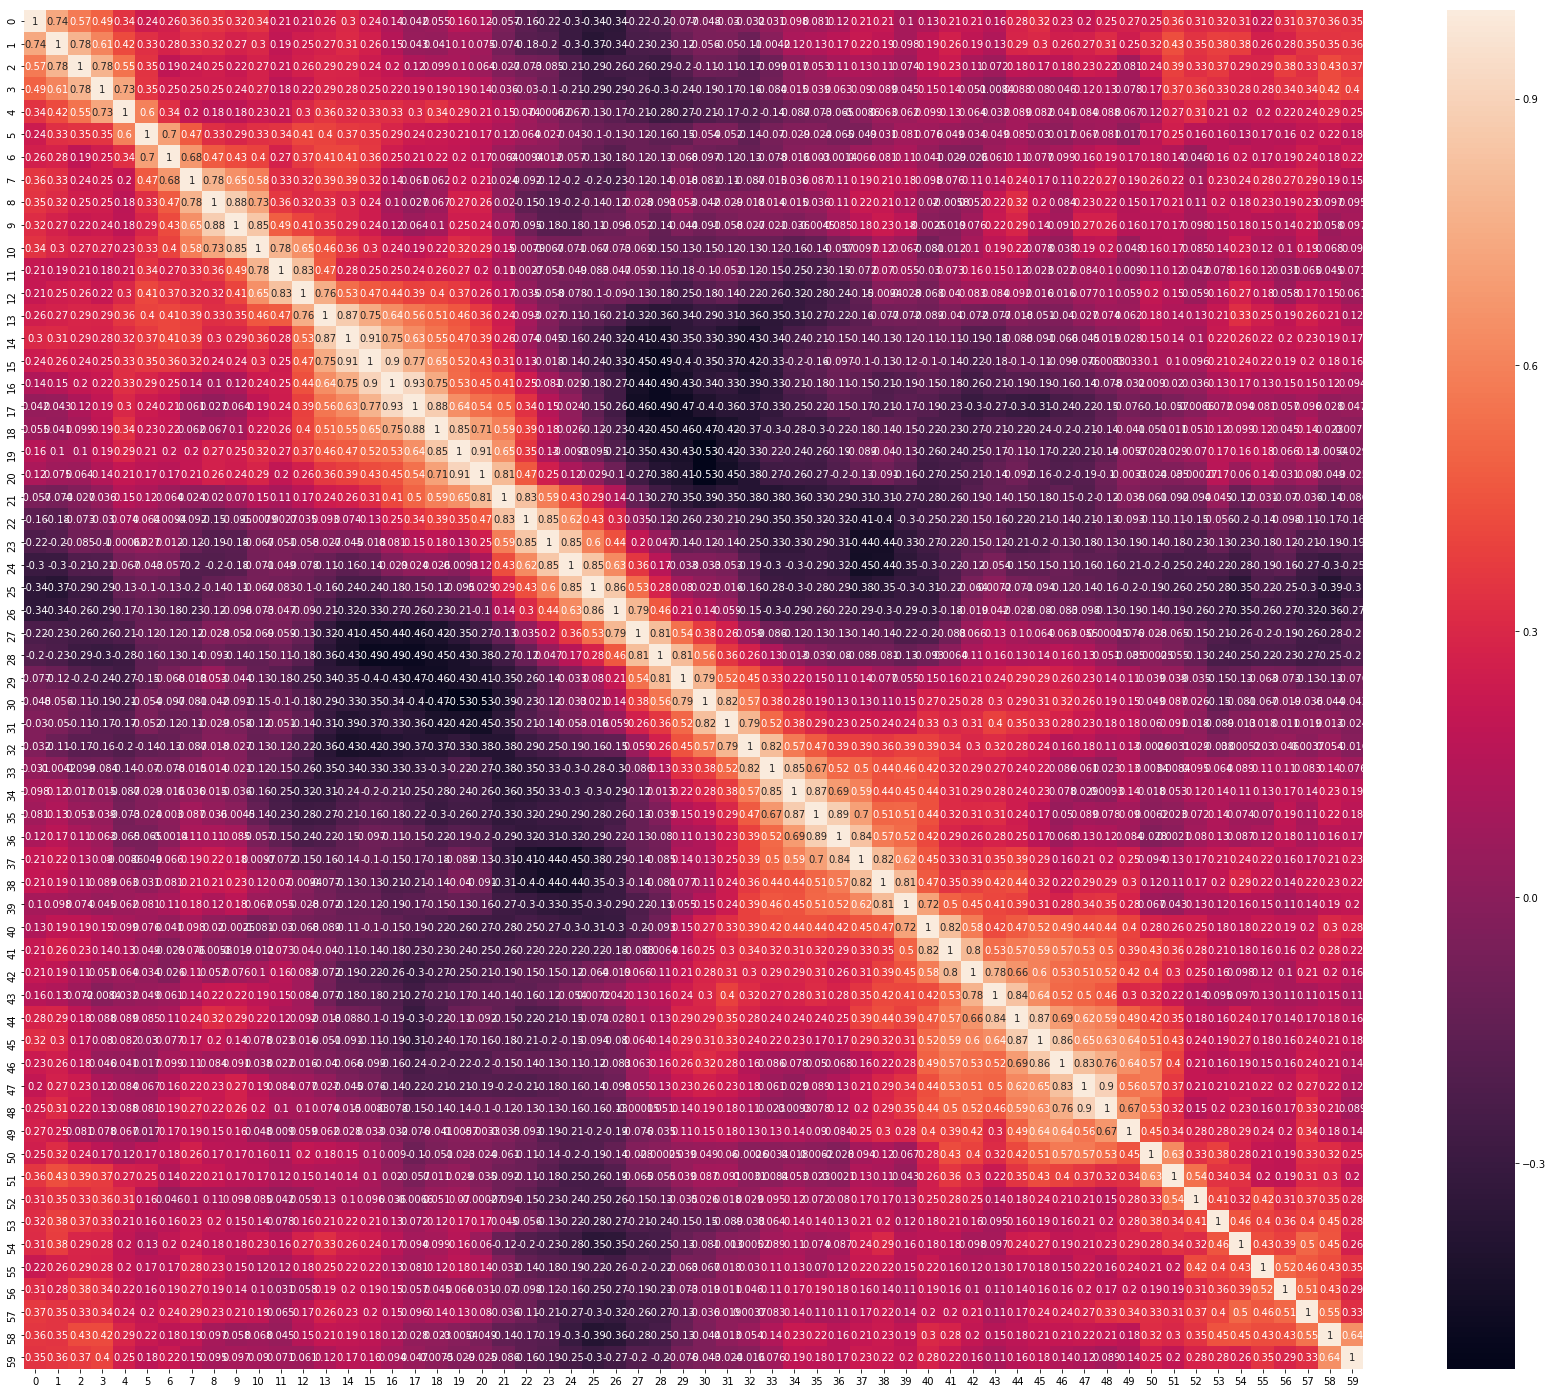

In [37]:
#correlation matirx
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(),annot=True)
plt.show()

It looks like there is also some <span class="mark">structure</span> in the <span class="mark">order of the attributes</span>. The red around
the diagonal suggests that <span class="girk">attributes that are next to each other</span> are generally <span class="girk">more correlated</span>
with each other. The <span class="mark">blue patches</span> also suggest some <span class="girk">moderate negative correlation</span> the further
attributes are away from each other in the ordering. This makes sense if the order of the
attributes refers to the angle of sensors for the sonar chirp.

In [38]:
array = df.values
X = array[:,0:60].astype(float)
Y = array[:,60]

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

We don't know what algorithms will do well on this dataset. Gut feel suggests distance based
algorithms like k-Nearest Neighbors and Support Vector Machines may do well.

We will evaluate algorithms using the accuracy
metric. This is a gross metric that will give a quick idea of how correct a given model is. More
useful on binary classification problems like this one.

accuracy: because class is balanced, we can use f1 score

In [42]:
from sklearn import metrics

In [43]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'f1_macro'

- Linear Algorithms: Logistic Regression (LR) and Linear Discriminant Analysis (LDA).
- Nonlinear Algorithms: Classification and Regression Trees (CART), Support Vector
    Machines (SVM), Gaussian Naive Bayes (NB) and k-Nearest Neighbors (KNN).

In [44]:
models = [('LR',LogisticRegression()),
         ('LDA',LinearDiscriminantAnalysis()),
         ('Knn',KNeighborsClassifier()),
         ('CART',DecisionTreeClassifier()),
         ('NB',GaussianNB()),
         ('SVM',SVC())]

In [45]:
results = []
names = []
means = []
stds = []

http://scikit-learn.org/stable/modules/cross_validation.html

In [46]:
for name,model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    
    results.append(cv_results)
    names.append(name)
    means.append(cv_results.mean())
    stds.append(cv_results.std())

In [51]:
pd.DataFrame(list(zip(names,means,stds))).sort_values(1,ascending=False)

,0,1,2
2,Knn,0.800522,0.070138
0,LR,0.773370,0.098166
1,LDA,0.733189,0.127883
3,CART,0.710651,0.114875
4,NB,0.636135,0.138990
5,SVM,0.597303,0.121560


As we can see KNN did the best, but lets look at the distribution of F1-scores

In [52]:
f1 = pd.DataFrame(dict(zip(names,results)))

In [54]:
f1.iplot(kind='box')

As we can see both KNN & Logistics are good but KNN has less variance.

It is possible that the varied distribution of the attributes is having an effect on the accuracy
of algorithms such as SVM. In the next section we will repeat this spot-check with a standardized
copy of the training dataset.

# Evaluate Algorithms: Standardize Data
We suspect that the <span class="burk">differing distributions</span> of the raw data may be <span class="mark">negatively impacting the skill
of some of the algorithms</span>. Let's evaluate the same algorithms with a standardized copy of the
dataset. This is where the data is transformed such that <span class="girk">each attribute has a mean value of zero
and a standard deviation of one.</span> We also need to avoid data leakage when we transform the
data. A good way to avoid leakage is to use pipelines that standardize the data and build the
model for each fold in the cross validation test harness. That way we can get a fair estimation
of how each model with standardized data might perform on unseen data.

In [55]:
pipelines = [('scalerLR',Pipeline([('scalar',StandardScaler()),('LR',LogisticRegression())])),
            ('scalerLda',Pipeline([('scalar',StandardScaler()),('Lda',LinearDiscriminantAnalysis())])),
            ('scalerKNN',Pipeline([('scalar',StandardScaler()),('KNN',KNeighborsClassifier())])),
            ('scalerCART',Pipeline([('scalar',StandardScaler()),('CART',DecisionTreeClassifier())])),
            ('scalerNB',Pipeline([('scalar',StandardScaler()),('NB',GaussianNB())])),
            ('scalerSVM',Pipeline([('scalar',StandardScaler()),('SVM',SVC())]))]

In [56]:
results = []
names = []
means = []
stds = []

In [57]:
for name,model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    
    results.append(cv_results)
    names.append(name)
    means.append(cv_results.mean())
    stds.append(cv_results.std())

In [59]:
pd.DataFrame(list(zip(names,means,stds)),columns=['Est','mean','std']).sort_values('mean',ascending=False)

,Est,mean,std
5,scalerSVM,0.830303,0.091034
2,scalerKNN,0.818445,0.058485
1,scalerLda,0.733189,0.127883
0,scalerLR,0.724249,0.104701
3,scalerCART,0.720643,0.086134
4,scalerNB,0.636135,0.138990


### Standardizing does helped., look at SVM GO!!
lets also look at the distribution

In [60]:
sc = pd.DataFrame(dict(zip(names,results)))

In [62]:
sc.iplot(kind='box')

## we'll tune both knn & svm

In [63]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

In [65]:
neighbors = [1,3,5,7,9,11,13,15,17,19,21]

model  = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)

grid = GridSearchCV(model,param_grid={'n_neighbors':neighbors},scoring=scoring,cv=kfold)
knngrid = grid.fit(rescaledX,Y_train)

In [66]:
knngrid.best_params_

{'n_neighbors': 1}

In [74]:
knngrid.best_score_

0.84300173919564803

In [67]:
mts = knngrid.cv_results_['mean_test_score']

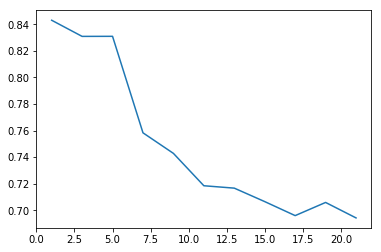

In [68]:
plt.plot(neighbors,mts)
plt.show()

We can see that the optimal configuration is K=1. This is interesting as the algorithm will
make predictions using the most similar instance in the training dataset alone.

## Tuning SVM
We can tune two key parameters of the SVM algorithm, the value of C (how much to relax the
margin) and the type of kernel. The default for SVM (the SVC class) is to use the Radial
Basis Function (RBF) kernel with a C value set to 1.0.

We will
try a number of simpler kernel types and C values with less bias and more bias (less than and
more than 1.0 respectively).

In [69]:
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)

In [70]:
model = SVC()
grid = GridSearchCV(model,param_grid=param_grid,scoring=scoring,cv=kfold)
svmgrid = grid.fit(rescaledX,Y_train)

C:\Users\szy0044\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\szy0044\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\szy0044\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



In [71]:
model = SVC()
grid = GridSearchCV(model,param_grid=param_grid,scoring='accuracy',cv=kfold)
svmgrid = grid.fit(rescaledX,Y_train)

In [72]:
svmgrid.best_params_

{'C': 1.5, 'kernel': 'rbf'}

In [73]:
svmgrid.best_score_

0.86746987951807231

### SVM is winning, lets look at ensembles now

- Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM) and XGBoost.
- Bagging Methods: Random Forests (RF) and Extra Trees (ET).

In [75]:
ensembles = [('AB',AdaBoostClassifier()),
            ('GBM',GradientBoostingClassifier()),
            ('XG',XGBClassifier()),
            ('RF',RandomForestClassifier()),
            ('ET',ExtraTreesClassifier())]

In [76]:
results = []
names = []
means = []
stds = []

In [77]:
for name,model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)#F1 score
    
    results.append(cv_results)
    names.append(name)
    means.append(cv_results.mean())
    stds.append(cv_results.std())

In [79]:
pd.DataFrame(list(zip(names,means,stds))).sort_values(1,ascending=False)

,0,1,2
1,GBM,0.842124,0.111560
2,XG,0.825467,0.106411
0,AB,0.811338,0.062819
4,ET,0.763028,0.111764
3,RF,0.720530,0.104052


In [80]:
es = pd.DataFrame(dict(zip(names,results)))

In [81]:
es.iplot(kind='box')

### lets try the same but with standardized data

In [82]:
ensembles = [('scaledAB',Pipeline([('scaler',StandardScaler()),('AB',AdaBoostClassifier())])),
            ('scaledXG',Pipeline([('scaler',StandardScaler()),('XG',XGBClassifier())])),
            ('scaledGBM',Pipeline([('scaler',StandardScaler()),('GB',GradientBoostingClassifier())])),
            ('scaledRF',Pipeline([('scaler',StandardScaler()),('RF',RandomForestClassifier())])),
            ('scaledET',Pipeline([('scaler',StandardScaler()),('ET',ExtraTreesClassifier())]))]

In [83]:
results = []
names = []
means = []
stds = []

In [84]:
for name,model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)#F1 score
    
    results.append(cv_results)
    names.append(name)
    means.append(cv_results.mean())
    stds.append(cv_results.std())

In [85]:
pd.DataFrame(list(zip(names,means,stds))).sort_values(1,ascending=False)

,0,1,2
2,scaledGBM,0.830105,0.092901
1,scaledXG,0.825467,0.106411
0,scaledAB,0.805799,0.069446
4,scaledET,0.797801,0.071355
3,scaledRF,0.720971,0.133824


In [86]:
es = pd.DataFrame(dict(zip(names,results)))
es.iplot(kind='box')

## although gbm & XG did great, look at Adaboost... much less variance

# To finalize, SVM did better than ensembles, so we'll do a final test on validation set

In [88]:
svmPipe = Pipeline([('scalar',StandardScaler()),('SVM',SVC(C=1.5))]) # 'C': 1.5, 'kernel': 'rbf'

In [89]:
svmPipe.fit(X_train,Y_train)

Pipeline(memory=None,
     steps=[('scalar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVM', SVC(C=1.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [90]:
pred = svmPipe.predict(X_validation)

In [91]:
from sklearn.metrics import classification_report

In [92]:
print(classification_report(Y_validation,pred))

             precision    recall  f1-score   support

          M       0.92      0.85      0.88        27
          R       0.76      0.87      0.81        15

avg / total       0.86      0.86      0.86        42



## we got about same f1-score in the tuning process...so GOOD!!!